**Importações**

In [1]:
import torch
import pandas as pd
import torch
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix

**Carregando o BERT**

In [2]:
# Carregando o tokenizer e modelo BERT
tokenizer = BertTokenizer.from_pretrained("neuralmind/bert-base-portuguese-cased")
model = BertModel.from_pretrained("neuralmind/bert-base-portuguese-cased")


tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/647 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

**Dados**

In [3]:
!curl  https://raw.githubusercontent.com/americanas-tech/b2w-reviews01/main/B2W-Reviews01.csv --output 'B2W-Reviews01.csv'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 47.1M  100 47.1M    0     0   9.9M      0  0:00:04  0:00:04 --:--:-- 13.2M


**Separar em Treino, Validação e Teste**

**Modelos Bert**

In [4]:
import torch
import torch.nn as nn
from transformers import BertModel
import torch.nn.functional as F

class BertForVowelDensityRegression(nn.Module):
    """
    Modelo BERT para a tarefa de regressão da densidade de vogais.
    """
    def __init__(self, model_name='neuralmind/bert-base-portuguese-cased'):
        super(BertForVowelDensityRegression, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        # Uma camada linear para regressão
        self.regressor = nn.Linear(self.bert.config.hidden_size, 1)

    def forward(self, input_ids, attention_mask=None, token_type_ids=None):
        outputs = self.bert(input_ids=input_ids,
                            attention_mask=attention_mask,
                            token_type_ids=token_type_ids)
        pooled_output = outputs.pooler_output
        # Use squeeze to remove the extra dimension
        return self.regressor(pooled_output).squeeze()

class BertForQuantizedClassification(nn.Module):
    """
    Modelo BERT para a tarefa de classificação quantizada.
    Inclui dropout para regularização e uma camada linear para classificação.
    """
    def __init__(self, model_name='neuralmind/bert-base-portuguese-cased', num_classes=3):
        super(BertForQuantizedClassification, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)

        # Adicionando dropout para regularização
        self.dropout = nn.Dropout(0.1)

        # Camada de classificação
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        # Passando os inputs através do modelo BERT
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)

        # Utilizando o pooled_output para tarefas de classificação
        pooled_output = outputs[1]

        # Aplicando dropout ao pooled_output
        pooled_output = self.dropout(pooled_output)

        # Retornando a saída da camada de classificação
        return self.classifier(pooled_output)

class BertForBalancedClassification(nn.Module):
    """
    Modelo BERT para classificação com classes balanceadas.
    """
    def __init__(self, model_name='neuralmind/bert-base-portuguese-cased', num_classes=3):
        super(BertForBalancedClassification, self).__init__()
        self.bert = BertModel.from_pretrained(model_name)
        self.classifier = nn.Linear(self.bert.config.hidden_size, num_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs[1]

        # Adicione uma camada softmax para calcular as probabilidades de classe
        logits = self.classifier(pooled_output)
        probabilities = F.softmax(logits, dim=-1)

        return logits, probabilities

**Pré processamento**

In [5]:
import pandas as pd

def save_dataframes():
    # Carregar dados diretamente do link usando o comando curl
    url = 'https://raw.githubusercontent.com/americanas-tech/b2w-reviews01/main/B2W-Reviews01.csv'
    df = pd.read_csv(url)

    # Dividir o conjunto de dados em treino, validação e teste
    train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
    train_df, val_df = train_test_split(train_df, test_size=0.1, random_state=42)

    # Salvar os conjuntos de dados em arquivos CSV
    train_df.to_csv('train_set.csv', index=False)
    val_df.to_csv('val_set.csv', index=False)
    test_df.to_csv('test_set.csv', index=False)

# Chamar a função para criar os conjuntos de dados
save_dataframes()


<ipython-input-5-f6087240066f>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [6]:
import torch
import torch.nn as nn

# Define your model
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()
        # Define your layers here

# Create an instance of your model
modelo = MyModel()

# Move the model to the GPU, if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo = modelo.to(device)


**Pré processamento**

In [7]:

import pandas as pd
from sklearn.model_selection import train_test_split

def load_and_preprocess_data(filepath):
    # Carregar o conjunto de dados
    df = pd.read_csv(filepath)

    # Manter apenas a coluna 'review_text' e renomeá-la para 'texto'
    df = df[['review_text']].rename(columns={'review_text': 'texto'})

    df = df.head(10000)

    return df

# Função para calcular a densidade de vogais
def calculate_vowel_density(text):
    vowels = "aeiouáéíóúãõâêîôûàèìòùäëïöüAEIOUÁÉÍÓÚÃÕÂÊÎÔÛÄËÏÖÜÀÈÌÒÙ"
    letters = [char for char in text if char.isalpha()]
    vowel_count = sum(char in vowels for char in letters)
    return vowel_count / len(letters) if letters else 0

def split_data(df):
    # Dividir os dados em treinamento, validação e teste (60%, 20%, 20%)
    train_df, temp_df = train_test_split(df, test_size=0.4, random_state=42)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)
    return train_df, val_df, test_df

def save_dataframes(train_df, val_df, test_df):
    train_df.to_csv('train_set_10k.csv', index=False)
    val_df.to_csv('val_set_10k.csv', index=False)
    test_df.to_csv('test_set_10k.csv', index=False)

def main():
    # Substitua 'your_dataset.csv' pelo caminho do seu arquivo de dados
    filepath = 'B2W-Reviews01.csv'
    df = load_and_preprocess_data(filepath)
    df = df.dropna(subset=['texto'])
    df['vowel_density'] = df['texto'].apply(calculate_vowel_density)
    train_df, val_df, test_df = split_data(df)
    save_dataframes(train_df, val_df, test_df)

if __name__ == "__main__":
    main()

<ipython-input-7-e985aceb892a>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)


In [8]:
# Importações
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr
import numpy as np


def load_and_preprocess_data(filepath):
    # Carregar o conjunto de dados
    df = pd.read_csv(filepath)

    # Manter apenas a coluna 'review_text' e renomeá-la para 'texto'
    df = df[['review_text']].rename(columns={'review_text': 'texto'})

    df = df.head(10000)

    return df

def calcular_metricas(y_real, y_pred):
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    valid_indices = ~np.isnan(y_real) & ~np.isnan(y_pred)
    pearson_corr, _ = pearsonr(y_real[valid_indices], y_pred[valid_indices])

    return rmse, mae, mape, r2, pearson_corr

def densidade_vogais_primeira_palavra(sentenca):
    primeira_palavra = sentenca.split()[0]
    return calculate_vowel_density(primeira_palavra)

def densidade_vogais_ultima_palavra(sentenca):
    ultima_palavra = sentenca.split()[-1]
    return calculate_vowel_density(ultima_palavra)

def avaliar_baseline(df):
    # Cálculo da densidade média do corpus como baseline
    densidade_media_corpus = df['vowel_density'].mean()
    df['densidade_corpus'] = np.full_like(df['vowel_density'], densidade_media_corpus)

    # Aplicação das funções de densidade de vogais
    df['densidade_primeira_palavra'] = df['texto'].apply(densidade_vogais_primeira_palavra)
    df['densidade_ultima_palavra'] = df['texto'].apply(densidade_vogais_ultima_palavra)

    resultados = []

    for baseline in ['densidade_corpus', 'densidade_primeira_palavra', 'densidade_ultima_palavra']:
        y_pred = df[baseline]
        y_real = df['vowel_density']
        rmse, mae, mape, r2, pearson_corr = calcular_metricas(y_real, y_pred)

        resultados.append({
            'Baseline': baseline,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2,
            'Pearson Correlation': pearson_corr
        })

    resultados_df = pd.DataFrame(resultados)
    return resultados_df


# Função Principal para Teste
def main():
    filepath = 'B2W-Reviews01.csv'
    df = load_and_preprocess_data(filepath)
    df = df.dropna(subset=['texto'])
    df['vowel_density'] = df['texto'].apply(calculate_vowel_density)
    # Carregar dados de teste

    # Avaliar os baselines
    resultados_baseline = avaliar_baseline(df)
    display(resultados_baseline)
    resultados_baseline.to_csv('baseline.csv', index=False)

if __name__ == "__main__":
    main()

<ipython-input-8-c33aaba30b2e>:12: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


,Baseline,RMSE,MAE,MAPE,R2,Pearson Correlation
0,densidade_corpus,0.039488,0.024089,1.792957e+12,0.000000,NaN
1,densidade_primeira_palavra,0.222531,0.146373,3.127098e-01,-30.758713,0.233098
2,densidade_ultima_palavra,0.148383,0.093810,1.958609e-01,-13.120397,0.271428


**Tarefa 1**

In [9]:
# Importações
from transformers import BertModel, BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
from transformers import BertTokenizer

class TextDataset(Dataset):
    def __init__(self, texts, densities):
        self.tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
        self.texts = texts
        self.densities = densities

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        density = self.densities[idx]
        inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                max_length=512, return_tensors="pt")
        # Usar squeeze() para garantir a forma correta
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        return {'input_ids': input_ids, 'attention_mask': attention_mask}, density

class TextDataset2(Dataset):
    def __init__(self, texts, class_labels):
        self.tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
        self.texts = texts
        self.class_labels = class_labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        class_label = self.class_labels[idx]
        inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                max_length=512, return_tensors="pt")
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        return {
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'class_label': torch.tensor(class_label, dtype=torch.long)
        }

def train(model, train_loader, optimizer, criterion, device):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        # Ensure that inputs and labels are on the correct device
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(**inputs).squeeze()  # Squeeze the output to match label shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Ensure that inputs and labels are on the correct device
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device).float()

            outputs = model(**inputs).squeeze()  # Squeeze the output to match label shape
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    print(f"Validation loss for epoch {epoch}: {avg_val_loss}")
    return avg_val_loss

def main():
    # Carregar e preparar dados de treino e validação
    train_df = pd.read_csv('train_set_10k.csv')
    val_df = pd.read_csv('val_set_10k.csv')

    train_dataset = TextDataset(train_df['texto'], train_df['vowel_density'])
    val_dataset = TextDataset(val_df['texto'], val_df['vowel_density'])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Inicializar modelo e critérios
    model = BertForVowelDensityRegression(model_name='neuralmind/bert-base-portuguese-cased')
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = torch.nn.MSELoss()
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    num_epochs = 10

    patience = 5  # Número de épocas para esperar após a última melhoria
    num_epochs_without_improvement = 0
    # Inicializar a melhor perda de validação
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    # Treinar e validar o modelo
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        train_loss = train(model, tqdm(train_loader, desc="Training"), optimizer, criterion, device)
        val_loss = evaluate(model, tqdm(val_loader, desc="Evaluating"), criterion, device)  # Add device argument
        train_losses.append(train_loss)
        print(f'Train Loss: {train_loss}')
        val_losses.append(val_loss)
        print(f'Val Loss: {val_loss}')
        print(f'Epoch {epoch}: Train Loss: {train_loss}, Val Loss: {val_loss}')

        scheduler.step(val_loss)

        # Verifica se houve melhoria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            num_epochs_without_improvement = 0
            model_save_path = 'model_best_val_loss.pt'
            torch.save(model.state_dict(), model_save_path)
            print(f"Model saved at epoch {epoch} with validation loss: {best_val_loss}")
        else:
            num_epochs_without_improvement += 1

        # Early stopping
        if num_epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs")
            break

    # Plotar as perdas
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.scatter(best_epoch, best_val_loss, color='red', marker='*', s=100, label=f'Best Epoch: {best_epoch}')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt


Epoch 1/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.13it/s]


Train Loss: 0.0029583510718697503
Val Loss: 0.0010176979441417107
Epoch 0: Train Loss: 0.0029583510718697503, Val Loss: 0.0010176979441417107
Model saved at epoch 0 with validation loss: 0.0010176979441417107
Epoch 2/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.15it/s]


Train Loss: 0.001164965352206172
Val Loss: 0.0009042543309481173
Epoch 1: Train Loss: 0.001164965352206172, Val Loss: 0.0009042543309481173
Model saved at epoch 1 with validation loss: 0.0009042543309481173
Epoch 3/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]


Train Loss: 0.0010216017219609554
Val Loss: 0.0009420561703441084
Epoch 2: Train Loss: 0.0010216017219609554, Val Loss: 0.0009420561703441084
Epoch 4/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]


Train Loss: 0.0009048337619576272
Val Loss: 0.0006260039849248792
Epoch 3: Train Loss: 0.0009048337619576272, Val Loss: 0.0006260039849248792
Model saved at epoch 3 with validation loss: 0.0006260039849248792
Epoch 5/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]


Train Loss: 0.0008136343155319369
Val Loss: 0.0006502690212968088
Epoch 4: Train Loss: 0.0008136343155319369, Val Loss: 0.0006502690212968088
Epoch 6/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.17it/s]


Train Loss: 0.0009671871251169886
Val Loss: 0.0006005714943758441
Epoch 5: Train Loss: 0.0009671871251169886, Val Loss: 0.0006005714943758441
Model saved at epoch 5 with validation loss: 0.0006005714943758441
Epoch 7/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.17it/s]


Train Loss: 0.001461308939647159
Val Loss: 0.00636373624801025
Epoch 6: Train Loss: 0.001461308939647159, Val Loss: 0.00636373624801025
Epoch 8/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.25it/s]


Train Loss: 0.0018576518396451456
Val Loss: 0.0015057942519426254
Epoch 7: Train Loss: 0.0018576518396451456, Val Loss: 0.0015057942519426254
Epoch 9/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.25it/s]


Train Loss: 0.0018720350870129027
Val Loss: 0.001466763253776036
Epoch 8: Train Loss: 0.0018720350870129027, Val Loss: 0.001466763253776036
Epoch 10/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.28it/s]


Train Loss: 0.0018842899923496687
Val Loss: 0.0017801365022142952
Epoch 9: Train Loss: 0.0018842899923496687, Val Loss: 0.0017801365022142952
Epoch 00010: reducing learning rate of group 0 to 1.0000e-05.
Epoch 11/15


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.27it/s]


Train Loss: 0.0016156827067726686
Val Loss: 0.0016426866956162037
Epoch 10: Train Loss: 0.0016156827067726686, Val Loss: 0.0016426866956162037
Early stopping triggered after 11 epochs


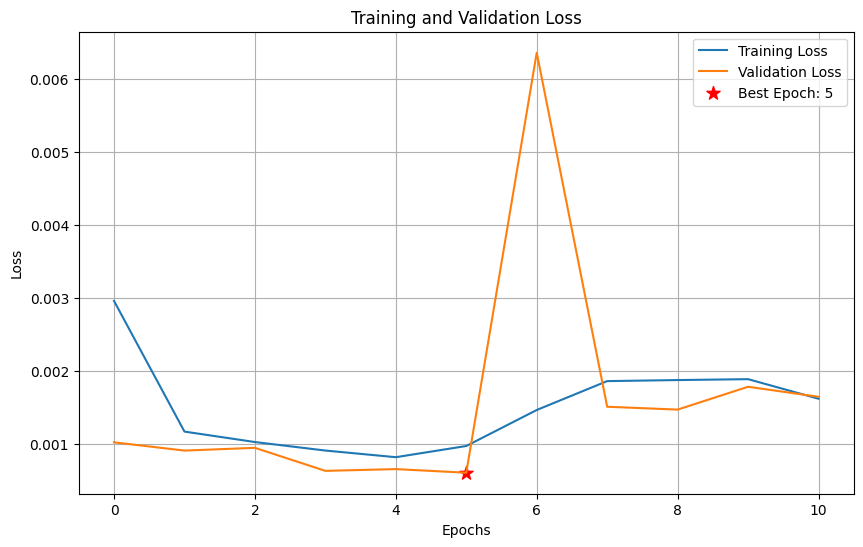

In [10]:
from transformers import BertModel, BertTokenizer
import torch
from torch.utils.data import Dataset, DataLoader
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np
import pandas as pd
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import matplotlib.pyplot as plt
from transformers import BertTokenizer
from tqdm import tqdm

class TextDataset(Dataset):
    def __init__(self, texts, densities):
        self.tokenizer = BertTokenizer.from_pretrained('neuralmind/bert-base-portuguese-cased')
        self.texts = texts
        self.densities = densities

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        density = self.densities[idx]
        inputs = self.tokenizer(text, padding='max_length', truncation=True,
                                max_length=512, return_tensors="pt")
        # Usar squeeze() para garantir a forma correta
        input_ids = inputs['input_ids'].squeeze()
        attention_mask = inputs['attention_mask'].squeeze()
        return {'input_ids': input_ids, 'attention_mask': attention_mask}, density

def train(model, train_loader, optimizer, criterion, device, epoch):
    model.train()
    total_loss = 0
    for inputs, labels in train_loader:
        # Ensure that inputs and labels are on the correct device
        inputs = {k: v.to(device) for k, v in inputs.items()}
        labels = labels.to(device).float()

        optimizer.zero_grad()
        outputs = model(**inputs).squeeze()  # Squeeze the output to match label shape
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device, epoch):
    model.eval()
    total_val_loss = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            # Ensure that inputs and labels are on the correct device
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device).float()

            outputs = model(**inputs).squeeze()  # Squeeze the output to match label shape
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

    avg_val_loss = total_val_loss / len(val_loader)
    return avg_val_loss

def main():
    # Carregar e preparar dados de treino e validação
    train_df = pd.read_csv('train_set_10k.csv')
    val_df = pd.read_csv('val_set_10k.csv')

    train_dataset = TextDataset(train_df['texto'], train_df['vowel_density'])
    val_dataset = TextDataset(val_df['texto'], val_df['vowel_density'])

    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Inicializar modelo e critérios
    model = BertForVowelDensityRegression(model_name='neuralmind/bert-base-portuguese-cased')
    model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    criterion = torch.nn.MSELoss()
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)
    num_epochs = 15

    patience = 5  # Número de épocas para esperar após a última melhoria
    num_epochs_without_improvement = 0
    # Inicializar a melhor perda de validação
    best_val_loss = float('inf')
    train_losses = []
    val_losses = []

    # Treinar e validar o modelo
    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")
        train_loss = train(model, tqdm(train_loader, desc="Training"), optimizer, criterion, device, epoch)
        val_loss = evaluate(model, tqdm(val_loader, desc="Evaluating"), criterion, device, epoch)  # Add device argument
        train_losses.append(train_loss)
        print(f'Train Loss: {train_loss}')
        val_losses.append(val_loss)
        print(f'Val Loss: {val_loss}')
        print(f'Epoch {epoch}: Train Loss: {train_loss}, Val Loss: {val_loss}')

        scheduler.step(val_loss)

        # Verifica se houve melhoria
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch
            num_epochs_without_improvement = 0
            model_save_path = 'model_best_val_loss.pt'
            torch.save(model.state_dict(), model_save_path)
            print(f"Model saved at epoch {epoch} with validation loss: {best_val_loss}")
        else:
            num_epochs_without_improvement += 1

        # Early stopping
        if num_epochs_without_improvement >= patience:
            print(f"Early stopping triggered after {epoch + 1} epochs")
            break

    # Plotar as perdas
    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.scatter(best_epoch, best_val_loss, color='red', marker='*', s=100, label=f'Best Epoch: {best_epoch}')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()


In [11]:

model_path = 'model_best_val_loss.pt'

saved_model_state = torch.load(model_path, map_location=torch.device('cpu'))
print(saved_model_state.keys())

# Instantiate your model and print its state dict keys
model = BertForVowelDensityRegression(model_name='neuralmind/bert-base-portuguese-cased')
print(model.state_dict().keys())



odict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output

In [17]:
# Importações
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from scipy.stats import pearsonr
import numpy as np



def calcular_metricas(y_real, y_pred):
    rmse = np.sqrt(mean_squared_error(y_real, y_pred))
    mae = mean_absolute_error(y_real, y_pred)
    mape = mean_absolute_percentage_error(y_real, y_pred)
    r2 = r2_score(y_real, y_pred)

    valid_indices = ~np.isnan(y_real) & ~np.isnan(y_pred)
    pearson_corr, _ = pearsonr(y_real[valid_indices], y_pred[valid_indices])

    return rmse, mae, mape, r2, pearson_corr

# Avaliação do modelo no conjunto de teste
def evaluate(model, test_loader, device):
    model.eval()
    y_pred = []
    y_real = []
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Move inputs and labels to the correct device
            inputs = {k: v.to(device) for k, v in inputs.items()}
            labels = labels.to(device)

            outputs = model(**inputs).squeeze()  # Ensure outputs match expected format
            logits = outputs.cpu().numpy()  # Move outputs back to CPU for numpy conversion
            y_pred.extend(logits)
            y_real.extend(labels.cpu().numpy())  # Move labels back to CPU for numpy conversion
    return y_pred, y_real  # Adicione esta linha

# Função Principal para Teste
def main():
    # Carregar dados de teste
    test_df = pd.read_csv('test_set_10k.csv')

    test_dataset = TextDataset(test_df['texto'], test_df['vowel_density'])

    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Carregar modelo treinado
    model = BertForVowelDensityRegression(model_name='neuralmind/bert-base-portuguese-cased')
    model_path = 'model_best_val_loss.pt'

    if torch.cuda.is_available():
        model.load_state_dict(torch.load(model_path))
    else:
        # Load the model on the CPU
        model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.to(device)
    model.eval()
    modelo = 'Regression_BERT'
    # Avaliação do Modelo
    y_pred, y_real = evaluate(model, test_loader, device)  # Capture os valores retornados
    rmse, mae, mape, r2, pearson_corr = calcular_metricas(np.array(y_real), np.array(y_pred))

    resultados_df = pd.DataFrame({
            'Baseline': modelo,
            'RMSE': rmse,
            'MAE': mae,
            'MAPE': mape,
            'R2': r2,
            'Pearson Correlation': pearson_corr
        }, index=[0])


    # Exibir o DataFrame
    display(resultados_df)
    resultados_df.to_csv('evaluation_metrics_regression.csv', index=False)

if __name__ == "__main__":
    main()

,Baseline,RMSE,MAE,MAPE,R2,Pearson Correlation
0,Regression_BERT,0.026361,0.014476,2.477155e+12,0.58961,0.786933


In [18]:

import pandas as pd

df_baseline = pd.read_csv('baseline.csv')
# Example DataFrames
df_model = pd.read_csv('evaluation_metrics_regression.csv')
# Combining the DataFrames
combined_df = pd.concat([df_model, df_baseline], ignore_index=True)
display(combined_df)


,Baseline,RMSE,MAE,MAPE,R2,Pearson Correlation
0,Regression_BERT,0.026361,0.014476,2.477155e+12,0.589610,0.786933
1,densidade_corpus,0.039488,0.024089,1.792957e+12,0.000000,NaN
2,densidade_primeira_palavra,0.222531,0.146373,3.127098e-01,-30.758713,0.233098
3,densidade_ultima_palavra,0.148383,0.093810,1.958609e-01,-13.120397,0.271428


from matplotlib import pyplot as plt
combined_df['RMSE'].plot(kind='hist', bins=20, title='RMSE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df['MAE'].plot(kind='hist', bins=20, title='MAE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df['MAPE'].plot(kind='hist', bins=20, title='MAPE')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df['R2'].plot(kind='hist', bins=20, title='R2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
combined_df.groupby('Baseline').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='RMSE', y='MAE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='MAE', y='MAPE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='MAPE', y='R2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df.plot(kind='scatter', x='R2', y='Pearson Correlation', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
combined_df['RMSE'].plot(kind='line', figsize=(8, 4), title='RMSE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
combined_df['MAE'].plot(kind='line', figsize=(8, 4), title='MAE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
combined_df['MAPE'].plot(kind='line', figsize=(8, 4), title='MAPE')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
combined_df['R2'].plot(kind='line', figsize=(8, 4), title='R2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_df['Baseline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='RMSE', y='Baseline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_df['Baseline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='MAE', y='Baseline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_df['Baseline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='MAPE', y='Baseline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(combined_df['Baseline'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(combined_df, x='R2', y='Baseline', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**Tarefa 2**

Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.12it/s]


Epoch 0: Train Loss: 0.03618679233198373, Val Loss: 0.014309971352855935, Accuracy: 0.997941327843541, Precision: 0.9977958748779412, Recall: 0.997941327843541, F1 Score: 0.9978131927903918
Model saved at epoch 0 with validation loss: 0.014309971352855935


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.17it/s]


Epoch 1: Train Loss: 0.028120429321568562, Val Loss: 0.029488559321836246, Accuracy: 0.9958826556870818, Precision: 0.9958996169406881, Recall: 0.9958826556870818, F1 Score: 0.9942399670272529


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2: Train Loss: 0.039408150260426, Val Loss: 0.028505281808587614, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.18it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3: Train Loss: 0.030059106015179256, Val Loss: 0.019202612237394102, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.19it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4: Train Loss: 0.027292644425473904, Val Loss: 0.01992757785225623, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858
Epoch 00005: reducing learning rate of group 0 to 1.0000e-05.


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.20it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5: Train Loss: 0.025335056814428877, Val Loss: 0.01884570810943842, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.20it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6: Train Loss: 0.024838522315178423, Val Loss: 0.018888710955058636, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.19it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7: Train Loss: 0.025633478294164964, Val Loss: 0.01905546498248262, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.21it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8: Train Loss: 0.025217645233241867, Val Loss: 0.018987994579995265, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858
Epoch 00009: reducing learning rate of group 0 to 1.0000e-06.


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.19it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9: Train Loss: 0.024058469796668074, Val Loss: 0.01893956771742583, Accuracy: 0.9953679876479671, Precision: 0.9907574308343635, Recall: 0.9953679876479671, F1 Score: 0.9930573578081858


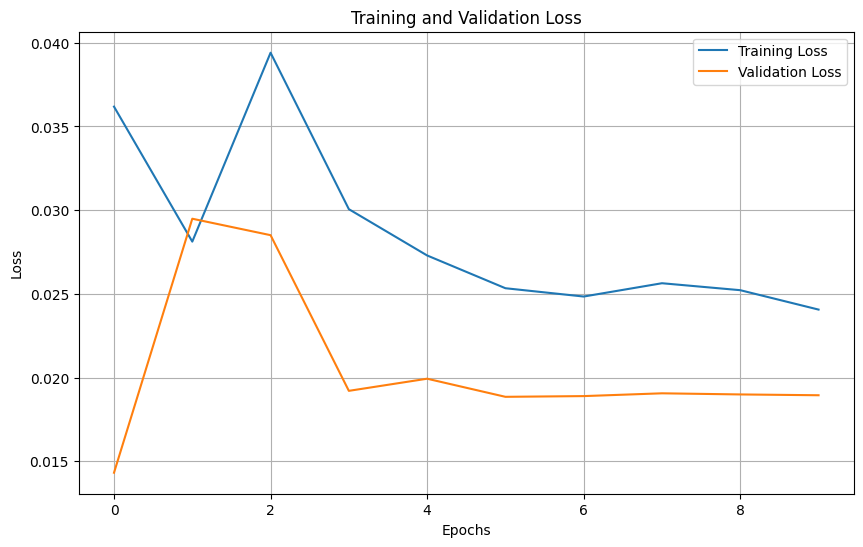

In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
import matplotlib.pyplot as plt


def define_class_labels(df, threshold_low, threshold_high):
    """
    Define class labels based on vowel density thresholds.
    """
    conditions = [
        df['vowel_density'] < threshold_low,
        df['vowel_density'].between(threshold_low, threshold_high),
        df['vowel_density'] > threshold_high
    ]
    df['class'] = np.select(conditions, [0, 1, 2])
    return df

def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for d in tqdm(train_loader, desc="Training"):
        input_ids, attention_mask, class_label = (d['input_ids'].to(device),
                                                  d['attention_mask'].to(device),
                                                  d['class_label'].to(device))

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, class_label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss, predictions, real_values = 0, [], []
    with torch.no_grad():
        for d in tqdm(val_loader, desc="Evaluating"):
            input_ids, attention_mask, class_label = (d['input_ids'].to(device),
                                                      d['attention_mask'].to(device),
                                                      d['class_label'].to(device))
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, class_label)
            total_loss += loss.item()
            predictions.extend(outputs.argmax(dim=1).cpu().numpy())
            real_values.extend(class_label.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(real_values, predictions)
    precision = precision_score(real_values, predictions, average='weighted')
    recall = recall_score(real_values, predictions, average='weighted')
    f1 = f1_score(real_values, predictions, average='weighted')

    return avg_loss, accuracy, precision, recall, f1

def main():
    train_df = pd.read_csv('train_set_10k.csv')
    val_df = pd.read_csv('val_set_10k.csv')

    train_df = define_class_labels(train_df, 1/3, 2/3)
    val_df = define_class_labels(val_df, 1/3, 2/3)

    train_dataset = TextDataset2(train_df['texto'], train_df['class'])
    val_dataset = TextDataset2(val_df['texto'], val_df['class'])
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BertForQuantizedClassification().to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

    best_val_loss = float('inf')
    train_losses, val_losses = [], []

    for epoch in range(10):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1 = evaluate(model, val_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch {epoch}: Train Loss: {train_loss}, Val Loss: {val_loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

        scheduler.step(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            model_save_path = 'model_best_val_loss_classification.pt'
            torch.save(model.state_dict(), model_save_path)
            print(f"Model saved at epoch {epoch} with validation loss: {best_val_loss}")

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

**Teste**

In [24]:
# Importações
import torch
from torch.utils.data import DataLoader
import pandas as pd
from tqdm import tqdm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix

def define_class_labels(df, threshold_low, threshold_high):
    """
    Define class labels based on vowel density thresholds.
    """
    conditions = [
        df['vowel_density'] < threshold_low,
        df['vowel_density'].between(threshold_low, threshold_high),
        df['vowel_density'] > threshold_high
    ]
    df['class'] = np.select(conditions, [0, 1, 2])
    return df

# Função para calcular a especificidade
def calculate_specificity(y_true, y_pred, class_id):
    cm = confusion_matrix(y_true, y_pred)
    true_negatives = cm.sum() - cm[:, class_id].sum() - cm[class_id, :].sum() + cm[class_id, class_id]
    false_positives = cm[:, class_id].sum() - cm[class_id, class_id]
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0
    return specificity


# Avaliação do modelo no conjunto de teste
def evaluate(model, val_loader, criterion, device):
    model.eval()  # Set the model to evaluation mode
    total_loss, predictions, real_values = 0, [], []

    if torch.cuda.is_available():
        model.to(device)

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Evaluating"):
            # Extract input_ids, attention_mask, and class_label from the batch
            data, class_label = batch
            input_ids = data['input_ids'].to(device)
            attention_mask = data['attention_mask'].to(device)
            class_label = class_label.to(device)

            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, class_label)
            total_loss += loss.item()

            predictions.extend(outputs.argmax(dim=1).cpu().numpy())
            real_values.extend(class_label.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(real_values, predictions)

    # Uso de zero_division e labels corretos
    precision = precision_score(real_values, predictions, average='weighted', labels=[0, 1, 2], zero_division=0)
    recall = recall_score(real_values, predictions, average='weighted', labels=[0, 1, 2], zero_division=0)
    f1 = f1_score(real_values, predictions, average='weighted', labels=[0, 1, 2])

    cm = confusion_matrix(real_values, predictions)
    class_accuracies = [(cm[i, i] / cm[i, :].sum()) if cm[i, :].sum() > 0 else 0 for i in range(3)]
    class_recalls = [recall_score(real_values, predictions, labels=[i], average='weighted', zero_division=0) for i in range(3)]
    class_specificities = [calculate_specificity(real_values, predictions, i) for i in range(3)]

    return avg_loss, accuracy, precision, recall, f1, class_accuracies, class_recalls, class_specificities, real_values, predictions

# Função Principal para

def main():
    test_df = pd.read_csv('test_set_10k.csv')
    test_df = define_class_labels(test_df, 1/3, 2/3)
    test_dataset = TextDataset(test_df['texto'], test_df['class'])
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = 'model_best_val_loss_classification.pt'
    model = BertForQuantizedClassification()
    criterion = torch.nn.CrossEntropyLoss()
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cuda' if torch.cuda.is_available() else 'cpu')))

    results = evaluate(model, test_loader, criterion, device)
    avg_loss, accuracy, precision, recall, f1, class_accuracies, class_recalls, class_specificities, _, _ = results

    resultados_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Class 0 Accuracy': [class_accuracies[0]],
        'Class 1 Accuracy': [class_accuracies[1]],
        'Class 2 Accuracy': [class_accuracies[2]],
        'Class 0 Recall': [class_recalls[0]],
        'Class 1 Recall': [class_recalls[1]],
        'Class 2 Recall': [class_recalls[2]],
        'Class 0 Specificity': [class_specificities[0]],
        'Class 1 Specificity': [class_specificities[1]],
        'Class 2 Specificity': [class_specificities[2]]
    })
    display(resultados_df)

    resultados_df.to_csv('evaluation_metrics_classification.csv', index=False)

if __name__ == "__main__":
    main()

Evaluating: 100%|██████████| 61/61 [00:18<00:00,  3.22it/s]


,Accuracy,Class 0 Accuracy,Class 1 Accuracy,Class 2 Accuracy,Class 0 Recall,Class 1 Recall,Class 2 Recall,Class 0 Specificity,Class 1 Specificity,Class 2 Specificity
0,0.998457,0.777778,1.0,0.0,0.777778,1.0,0.0,0.999483,0.8,1.0


**Tarefa 3**

Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.15it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 0: Train Loss: 1.1153115533802607, Val Loss: 1.1321410658906719, Accuracy: 0.3329902213072568, Precision: 0.11088248748625587, Recall: 0.3329902213072568, F1 Score: 0.16636654300061401
Model saved at epoch 0 with validation loss: 1.1321410658906719


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1: Train Loss: 1.1060924962775347, Val Loss: 1.0986861811309565, Accuracy: 0.3340195573854864, Precision: 0.11156906471599623, Recall: 0.3340195573854864, F1 Score: 0.16726750983270114
Model saved at epoch 1 with validation loss: 1.0986861811309565


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.18it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 2: Train Loss: 1.1041515484248121, Val Loss: 1.1011074996385417, Accuracy: 0.3340195573854864, Precision: 0.11156906471599623, Recall: 0.3340195573854864, F1 Score: 0.16726750983270114


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.15it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 3: Train Loss: 1.1012152253764949, Val Loss: 1.1005777228073996, Accuracy: 0.3329902213072568, Precision: 0.11088248748625587, Recall: 0.3329902213072568, F1 Score: 0.16636654300061401


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.15it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 4: Train Loss: 1.1030098898770058, Val Loss: 1.1002478277096983, Accuracy: 0.3329902213072568, Precision: 0.11088248748625587, Recall: 0.3329902213072568, F1 Score: 0.16636654300061401


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 5: Train Loss: 1.1026403851705056, Val Loss: 1.0994710296881003, Accuracy: 0.3340195573854864, Precision: 0.11156906471599623, Recall: 0.3340195573854864, F1 Score: 0.16726750983270114
Epoch 00006: reducing learning rate of group 0 to 1.0000e-05.


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.17it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 6: Train Loss: 1.0997803247138245, Val Loss: 1.0986321079926413, Accuracy: 0.3329902213072568, Precision: 0.11088248748625587, Recall: 0.3329902213072568, F1 Score: 0.16636654300061401
Model saved at epoch 6 with validation loss: 1.0986321079926413


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.18it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 7: Train Loss: 1.0993580886762435, Val Loss: 1.098593129486334, Accuracy: 0.3340195573854864, Precision: 0.11156906471599623, Recall: 0.3340195573854864, F1 Score: 0.16726750983270114
Model saved at epoch 7 with validation loss: 1.098593129486334


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.17it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 8: Train Loss: 1.0989198518125978, Val Loss: 1.0985975490241755, Accuracy: 0.3340195573854864, Precision: 0.11156906471599623, Recall: 0.3340195573854864, F1 Score: 0.16726750983270114


Evaluating: 100%|██████████| 122/122 [00:19<00:00,  6.16it/s]
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 9: Train Loss: 1.099629472706416, Val Loss: 1.098598599433899, Accuracy: 0.3340195573854864, Precision: 0.11156906471599623, Recall: 0.3340195573854864, F1 Score: 0.16726750983270114
Epoch 00010: reducing learning rate of group 0 to 1.0000e-06.


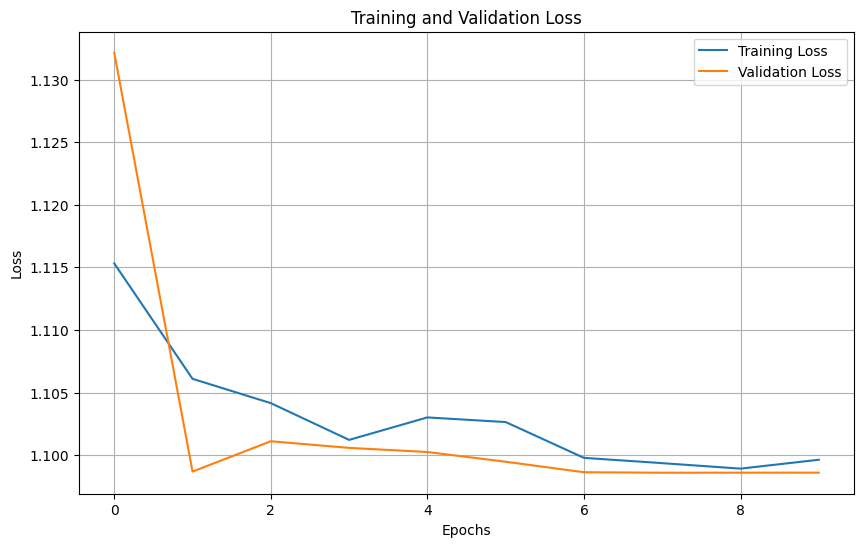

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

import matplotlib.pyplot as plt

def define_class_labels(df):
    """
    Define class labels for balanced classes.
    """
    class_labels = []
    num_classes = 3
    class_size = len(df) // num_classes

    for i in range(num_classes - 1):
        class_labels.extend([i] * class_size)

    # A última classe recebe os exemplos restantes
    class_labels.extend([num_classes - 1] * (len(df) - (class_size * (num_classes - 1))))

    df['class'] = class_labels
    return df
def train(model, train_loader, criterion, optimizer, device):
    model.train()
    total_loss = 0
    for d in tqdm(train_loader, desc="Training"):
        input_ids, attention_mask, class_label = (d['input_ids'].to(device),
                                                  d['attention_mask'].to(device),
                                                  d['class_label'].to(device))

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, class_label)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    return total_loss / len(train_loader)

def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss, predictions, real_values = 0, [], []
    with torch.no_grad():
        for d in tqdm(val_loader, desc="Evaluating"):
            input_ids, attention_mask, class_label = (d['input_ids'].to(device),
                                                      d['attention_mask'].to(device),
                                                      d['class_label'].to(device))
            outputs = model(input_ids, attention_mask)
            loss = criterion(outputs, class_label)
            total_loss += loss.item()
            predictions.extend(outputs.argmax(dim=1).cpu().numpy())
            real_values.extend(class_label.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(real_values, predictions)
    precision = precision_score(real_values, predictions, average='weighted')
    recall = recall_score(real_values, predictions, average='weighted')
    f1 = f1_score(real_values, predictions, average='weighted')

    return avg_loss, accuracy, precision, recall, f1

def main():
    train_df = pd.read_csv('train_set_10k.csv')
    val_df = pd.read_csv('val_set_10k.csv')

    # Define class labels for balanced classes
    train_df = define_class_labels(train_df)
    val_df = define_class_labels(val_df)

    train_dataset = TextDataset2(train_df['texto'], train_df['class'])
    val_dataset = TextDataset2(val_df['texto'], val_df['class'])
    train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=16)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = BertForQuantizedClassification().to(device)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)
    scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

    best_val_loss = float('inf')
    train_losses, val_losses = [], []

    for epoch in range(10):
        train_loss = train(model, train_loader, criterion, optimizer, device)
        val_loss, accuracy, precision, recall, f1 = evaluate(model, val_loader, criterion, device)
        train_losses.append(train_loss)
        val_losses.append(val_loss)

        print(f'Epoch {epoch}: Train Loss: {train_loss}, Val Loss: {val_loss}, Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1}')

        scheduler.step(val_loss)
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            model_save_path = 'model_best_val_loss_classification_task3.pt'
            torch.save(model.state_dict(), model_save_path)
            print(f"Model saved at epoch {epoch} with validation loss: {best_val_loss}")

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()

In [26]:


import torch

model_path = 'model_best_val_loss_classification_task3.pt'

saved_model_state = torch.load(model_path, map_location=torch.device('cpu'))
print(saved_model_state.keys())

# Instantiate your model and print its state dict keys
model = BertForVowelDensityRegression(model_name='neuralmind/bert-base-portuguese-cased')
print(model.state_dict().keys())

odict_keys(['bert.embeddings.word_embeddings.weight', 'bert.embeddings.position_embeddings.weight', 'bert.embeddings.token_type_embeddings.weight', 'bert.embeddings.LayerNorm.weight', 'bert.embeddings.LayerNorm.bias', 'bert.encoder.layer.0.attention.self.query.weight', 'bert.encoder.layer.0.attention.self.query.bias', 'bert.encoder.layer.0.attention.self.key.weight', 'bert.encoder.layer.0.attention.self.key.bias', 'bert.encoder.layer.0.attention.self.value.weight', 'bert.encoder.layer.0.attention.self.value.bias', 'bert.encoder.layer.0.attention.output.dense.weight', 'bert.encoder.layer.0.attention.output.dense.bias', 'bert.encoder.layer.0.attention.output.LayerNorm.weight', 'bert.encoder.layer.0.attention.output.LayerNorm.bias', 'bert.encoder.layer.0.intermediate.dense.weight', 'bert.encoder.layer.0.intermediate.dense.bias', 'bert.encoder.layer.0.output.dense.weight', 'bert.encoder.layer.0.output.dense.bias', 'bert.encoder.layer.0.output.LayerNorm.weight', 'bert.encoder.layer.0.output

In [27]:
import torch
from torch.utils.data import DataLoader
import pandas as pd
from tqdm import tqdm
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Função para calcular métricas por classe
def calculate_specificity(y_true, y_pred, class_id):
    cm = confusion_matrix(y_true, y_pred)
    true_negatives = cm.sum() - cm[:, class_id].sum() - cm[class_id, :].sum() + cm[class_id, class_id]
    false_positives = cm[:, class_id].sum() - cm[class_id, class_id]
    specificity = true_negatives / (true_negatives + false_positives) if (true_negatives + false_positives) > 0 else 0
    return specificity

# Função de avaliação
def evaluate(model, val_loader, criterion, device):
    model.eval()
    total_loss, predictions, real_values = 0, [], []

    with torch.no_grad():
        for batch in tqdm(val_loader, desc="Evaluating"):
            data_dict, class_label = batch
            input_ids = data_dict['input_ids'].to(device)
            attention_mask = data_dict['attention_mask'].to(device)
            class_label = class_label.to(device)

            # Obter apenas os logits da saída do modelo
            outputs = model(input_ids, attention_mask)
            logits = outputs[0] if isinstance(outputs, tuple) else outputs

            loss = criterion(logits, class_label)
            total_loss += loss.item()

            predictions.extend(logits.argmax(dim=1).cpu().numpy())
            real_values.extend(class_label.cpu().numpy())

    avg_loss = total_loss / len(val_loader)
    accuracy = accuracy_score(real_values, predictions)

    # Uso de zero_division e labels corretos
    precision = precision_score(real_values, predictions, average='weighted', labels=[0, 1, 2], zero_division=0)
    recall = recall_score(real_values, predictions, average='weighted', labels=[0, 1, 2], zero_division=0)
    f1 = f1_score(real_values, predictions, average='weighted', labels=[0, 1, 2])

    cm = confusion_matrix(real_values, predictions)
    class_accuracies = [(cm[i, i] / cm[i, :].sum()) if cm[i, :].sum() > 0 else 0 for i in range(3)]
    class_recalls = [recall_score(real_values, predictions, labels=[i], average='weighted', zero_division=0) for i in range(3)]
    class_specificities = [calculate_specificity(real_values, predictions, i) for i in range(3)]

    return avg_loss, accuracy, precision, recall, f1, class_accuracies, class_recalls, class_specificities, real_values, predictions

# Função Principal para Avaliar Tarefa 3
def main():
    test_df = pd.read_csv('test_set_10k.csv')
    test_df = define_class_labels(test_df)
    test_dataset = TextDataset(test_df['texto'], test_df['class'])
    test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    model_path = 'model_best_val_loss_classification_task3.pt'
    model = BertForBalancedClassification()
    criterion = torch.nn.CrossEntropyLoss()
    model.load_state_dict(torch.load(model_path, map_location=device))
    model.to(device)

    results = evaluate(model, test_loader, criterion, device)
    avg_loss, accuracy, precision, recall, f1, class_accuracies, class_recalls, class_specificities, _, _ = results

    resultados_df = pd.DataFrame({
        'Accuracy': [accuracy],
        'Class 0 Accuracy': [class_accuracies[0]],
        'Class 1 Accuracy': [class_accuracies[1]],
        'Class 2 Accuracy': [class_accuracies[2]],
        'Class 0 Recall': [class_recalls[0]],
        'Class 1 Recall': [class_recalls[1]],
        'Class 2 Recall': [class_recalls[2]],
        'Class 0 Specificity': [class_specificities[0]],
        'Class 1 Specificity': [class_specificities[1]],
        'Class 2 Specificity': [class_specificities[2]]
    })
    display(resultados_df)
    # Salva as métricas em um arquivo CSV
    resultados_df.to_csv('evaluation_metrics_classification_task3.csv', index=False)

if __name__ == "__main__":
    main()

Evaluating: 100%|██████████| 61/61 [00:18<00:00,  3.23it/s]


,Accuracy,Class 0 Accuracy,Class 1 Accuracy,Class 2 Accuracy,Class 0 Recall,Class 1 Recall,Class 2 Recall,Class 0 Specificity,Class 1 Specificity,Class 2 Specificity
0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


**Comparações entre às tarefas**

In [28]:

import pandas as pd

# Carregar os DataFrames
task2 = pd.read_csv('evaluation_metrics_classification.csv')
task3 = pd.read_csv('evaluation_metrics_classification_task3.csv')

# Adicionar uma coluna identificando a tarefa
task2['Task'] = 'TAREFA 2'
task3['Task'] = 'TAREFA 3'

# Concatenar os DataFrames
compare = pd.concat([task2, task3], ignore_index=True)

colunas = ['Task'] + [col for col in compare if col != 'Task']
compare = compare[colunas]

compare_transposed = compare.transpose()

display(compare_transposed)


,0,1
Task,TAREFA 2,TAREFA 3
Accuracy,0.998457,0.333333
Class 0 Accuracy,0.777778,0.0
Class 1 Accuracy,1.0,0.0
Class 2 Accuracy,0.0,1.0
Class 0 Recall,0.777778,0.0
Class 1 Recall,1.0,0.0
Class 2 Recall,0.0,1.0
Class 0 Specificity,0.999483,1.0
Class 1 Specificity,0.8,1.0
